<a href="https://colab.research.google.com/github/rayhanff/Tugas-Python/blob/main/Python_image_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
cd/content/drive/MyDrive

/content/drive/MyDrive


In [68]:
ls

 3scene/
'50 Lighroom Mobile Presets - 50k Subs Special.zip'
'Colab Notebooks'/
'Cover   Format  TP & Jurnal Fisika Dasar 2'/
 GMB_01@
 GMB_02@
 GMB_03@
 GMB_04@
 GMB_05@
 inggris/
 jalanan.jpg
'Kehadiran klinik belajar.png'
'Kehadiran Openmind.jpg'
 Kehadiran.png
 Memories/
 nnmodel_scene/


In [69]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [70]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("3scene")
data = []
labels = []

[INFO] loading images...


In [71]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((128, 128))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [72]:
print(labels)

['highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway'

In [73]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [74]:
print(labels)

[[0 0 1]
 [0 0 1]
 [0 0 1]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [75]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(711, 128, 128, 3)
(237, 128, 128, 3)


In [77]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(128,128,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(3, activation='softmax'))

model1.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 126, 126, 8)       224       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 63, 63, 8)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 61, 61, 16)        1168      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 14400)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               1440100   
_________________________________________________________________
dense_7 (Dense)              (None, 3)                

In [78]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
    [
        Flatten(input_shape=(128*128*3,)),
        Dense(150, activation="relu", name="layer1"),
        Dense(32, activation="relu", name="layer2"),
        Dense(32, activation="relu", name="layer3"),
        Dense(3, activation = "softmax", name="layer4"),
    ]
)

In [79]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 49152)             0         
_________________________________________________________________
layer1 (Dense)               (None, 150)               7372950   
_________________________________________________________________
layer2 (Dense)               (None, 32)                4832      
_________________________________________________________________
layer3 (Dense)               (None, 32)                1056      
_________________________________________________________________
layer4 (Dense)               (None, 3)                 99        
Total params: 7,378,937
Trainable params: 7,378,937
Non-trainable params: 0
_________________________________________________________________


In [80]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [81]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Epoch 1/25
23/23 [==============================] - 6s 255ms/step - loss: 1.0525 - accuracy: 0.5696 - val_loss: 0.5555 - val_accuracy: 0.7679
Epoch 2/25
23/23 [==============================] - 6s 249ms/step - loss: 0.4424 - accuracy: 0.8368 - val_loss: 0.3270 - val_accuracy: 0.8987
Epoch 3/25
23/23 [==============================] - 6s 254ms/step - loss: 0.2854 - accuracy: 0.9015 - val_loss: 0.3644 - val_accuracy: 0.8650
Epoch 4/25
23/23 [==============================] - 6s 254ms/step - loss: 0.2266 - accuracy: 0.9170 - val_loss: 0.2783 - val_accuracy: 0.9114
Epoch 5/25
23/23 [==============================] - 6s 252ms/step - loss: 0.2723 - accuracy: 0.8917 - val_loss: 0.3088 - val_accuracy: 0.8987
Epoch 6/25
23/23 [==============================] - 6s 252ms/step - loss: 0.2098 - accuracy: 0.9325 - val_loss: 0.3477 - val_accuracy: 0.8945
Epoch 7/25
23/23 [==============================] - 6s 251ms/step - loss: 0.1351 - accuracy: 0.9592 - val_loss: 0.3720 - val_accuracy: 0.8734
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


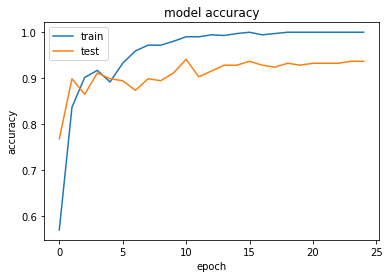

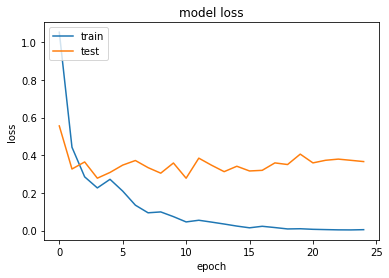

In [82]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [83]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

       coast       0.93      0.93      0.93       106
      forest       0.97      1.00      0.99        70
     highway       0.90      0.87      0.88        61

    accuracy                           0.94       237
   macro avg       0.93      0.93      0.93       237
weighted avg       0.94      0.94      0.94       237



In [84]:
model.save('nnmodel_scene')

INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [86]:
import cv2
import matplotlib.pyplot as plt
image1='jalanan.jpg'

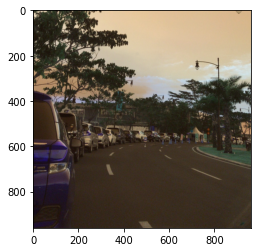

In [87]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [89]:
image_testing = Image.open('jalanan.jpg')
image_testing = np.array(image_testing.resize((128, 128))) / 255.0
image_testing.shape

(128, 128, 3)

In [91]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 128, 128, 3)


In [92]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[0.28107843 0.28052488 0.43839666]]
['highway']
